In [1]:
from frgpascal.analysis.processing import load_all
import matplotlib.pyplot as plt
from pathlib import Path
import json # load maestro logs
import pandas as pd
import numpy as np

In [2]:
# load a csv file

path = 'data/output/20221011_B9-char_1/'
metrics = pd.read_csv(path + 'fitted_characterization_metrics.csv')
metrics

,Unnamed: 0,pl_intensity_0,pl_peakev_0,pl_fwhm_0,t_bandgap_0,t_samplepresent_0,df_median_0,bf_inhomogeneity_0,name
0,sample0,174.176938,1.677392,0.096823,NaN,True,140.03584,0.154434,sample0
1,sample1,175.216607,1.676216,0.098287,NaN,True,140.84517,0.034818,sample1
2,sample2,253.082279,1.677381,0.097397,NaN,True,140.30478,0.033021,sample2
3,sample3,183.368298,1.677104,0.097168,1.764107,True,139.91630,0.036609,sample3
4,sample4,279.598707,1.677065,0.096425,NaN,True,140.98710,0.031844,sample4
5,sample5,210.086825,1.676960,0.095493,1.854573,True,140.95224,0.123810,sample5
6,sample6,235.359654,1.677107,0.096805,NaN,True,141.80391,0.032335,sample6
7,sample7,160.327952,1.676423,0.096087,1.844298,True,141.10165,0.034108,sample7
8,sample8,176.236739,1.676698,0.098563,NaN,True,140.71817,0.052047,sample8
9,sample9,83.560557,1.677186,0.101346,NaN,True,140.06075,0.036251,sample9


Text(0.5, 0, 'pl_peakev_0')

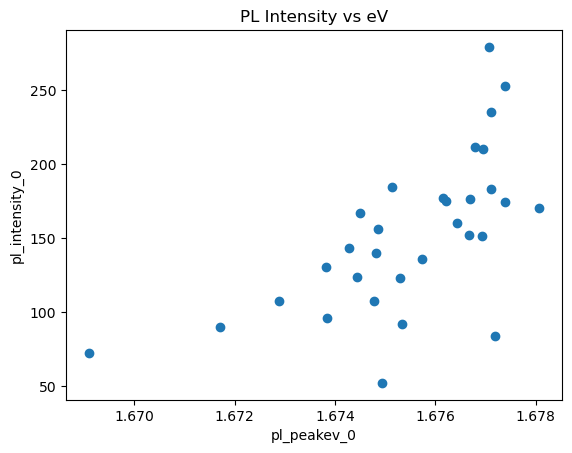

In [3]:
plt.title('PL Intensity vs eV')
plt.scatter(metrics['pl_peakev_0'], metrics['pl_intensity_0'])
plt.ylabel('pl_intensity_0')
plt.xlabel('pl_peakev_0')

Text(0.5, 0, 'Sample Number')

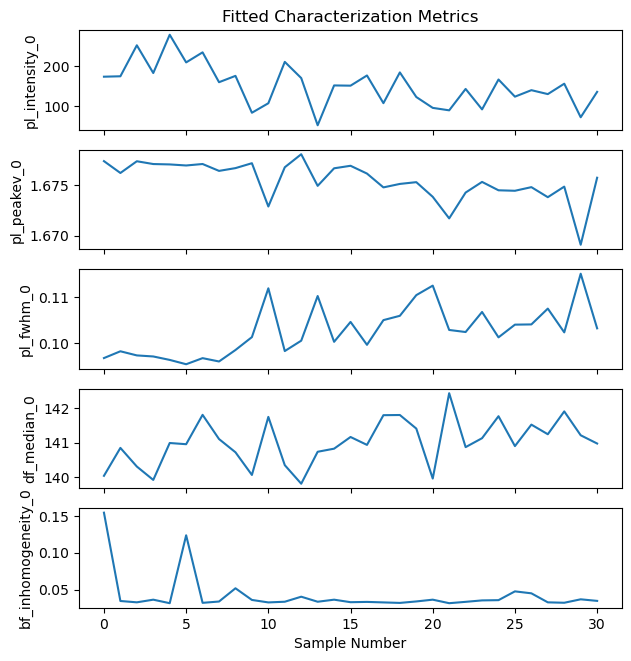

In [4]:
# visualize the change in metrics over time
# note a line graph only makes sense if the samples are indeed sequential

columns = ['pl_intensity_0', 'pl_peakev_0', 'pl_fwhm_0', 'df_median_0', 'bf_inhomogeneity_0']
nrows=len(columns)

fig, ax = plt.subplots(nrows=nrows, ncols=1, sharex=True, figsize=(7,nrows*1.5))
ax[0].set_title('Fitted Characterization Metrics')

for i in range(nrows):
    plt.subplot(nrows,1,i+1)
    plt.ylabel(columns[i])
    plt.plot(metrics[columns[i]])
plt.xlabel('Sample Number')

In [5]:
from natsort import index_natsorted

def load_all_sorted(chardir):
	metricdf, rawdf = load_all(
		chardir,
		t_kwargs=dict(
			wlmin=700,
			wlmax=900
		)
	)
	rawdf= rawdf.sort_values(
   		by='name',
   		key=lambda x: np.argsort(index_natsorted(rawdf['name']))
    )
	rawdf = rawdf.reset_index(drop=True)


	metricdf= metricdf.sort_values(
    	by='name',
    	key=lambda x: np.argsort(index_natsorted(metricdf['name']))
    )
	metricdf = metricdf.reset_index(drop=True)
	return metricdf, rawdf

In [6]:
chardir_0 = 'data/output/20221011_B9-char_1/Characterization/'
metricdf, rawdf = load_all_sorted(chardir_0)

Loading data:   0%|          | 0/31 [00:00<?, ?sample/s]/home/kcw/anaconda3/envs/fenning/lib/python3.7/site-packages/frgpascal/analysis/processing.py:103: RuntimeWarning: invalid value encountered in log10
  a = -np.log10(t)
Loading data:  13%|█▎        | 4/31 [00:45<04:54, 10.91s/sample]/home/kcw/anaconda3/envs/fenning/lib/python3.7/site-packages/frgpascal/analysis/processing.py:103: RuntimeWarning: divide by zero encountered in log10
  a = -np.log10(t)
Loading data: 100%|██████████| 31/31 [05:38<00:00, 10.93s/sample]


In [7]:
metricdf.columns

Index(['pl_intensity_0', 'pl_peakev_0', 'pl_fwhm_0', 't_bandgap_0',
       't_samplepresent_0', 'df_median_0', 'bf_inhomogeneity_0', 'name'],
      dtype='object')

In [8]:
# determine what type of data
for c in rawdf.columns:
    print(c, type(rawdf[c][0]))
print('pl_0 keys: ' + str(rawdf['pl_0'][0].keys()))
print('pl_0["wl"] shape: ' + str(rawdf['pl_0'][0]['wl'].shape))
print('pl_0["cps"] shape: ' + str(rawdf['pl_0'][0]['cps'].shape))

print('t_0 keys: ' + str(rawdf['t_0'][0].keys()))
print('t_0["wl"] shape: ' + str(rawdf['t_0'][0]['wl'].shape))
print('t_0["t"] shape: ' + str(rawdf['t_0'][0]['t'].shape))
print('t_0["a"] shape: ' + str(rawdf['t_0'][0]['a'].shape))

print('df_0 shape: ' + str(rawdf['df_0'][0].shape))
print('bf_0 shape: ' + str(rawdf['bf_0'][0].shape))
print('plimg_0 shape: ' + str(rawdf['plimg_0'][0].shape))

rawdf.head(1)

pl_0 <class 'dict'>
t_0 <class 'dict'>
df_0 <class 'numpy.ndarray'>
bf_0 <class 'numpy.ndarray'>
plimg_0 <class 'numpy.ndarray'>
name <class 'str'>
pl_0 keys: dict_keys(['wl', 'cps'])
pl_0["wl"] shape: (2048,)
pl_0["cps"] shape: (2048,)
t_0 keys: dict_keys(['wl', 't', 'a'])
t_0["wl"] shape: (2047,)
t_0["t"] shape: (2047,)
t_0["a"] shape: (2047,)
df_0 shape: (1080, 1440, 3)
bf_0 shape: (1080, 1440, 3)
plimg_0 shape: (1080, 1440, 3)


,pl_0,t_0,df_0,bf_0,plimg_0,name
0,"{'wl': [178.95, 179.38, 179.8, 180.23, 180.65,...","{'wl': [179.38, 179.8, 180.23, 180.65, 181.08,...","[[[96.16787, 57.04131, 0.0], [96.99463, 56.334...","[[[0.6191406, 0.53027344, 0.6425781], [0.59277...","[[[0.81152344, 0.61328125, 0.0], [0.85058594, ...",sample0


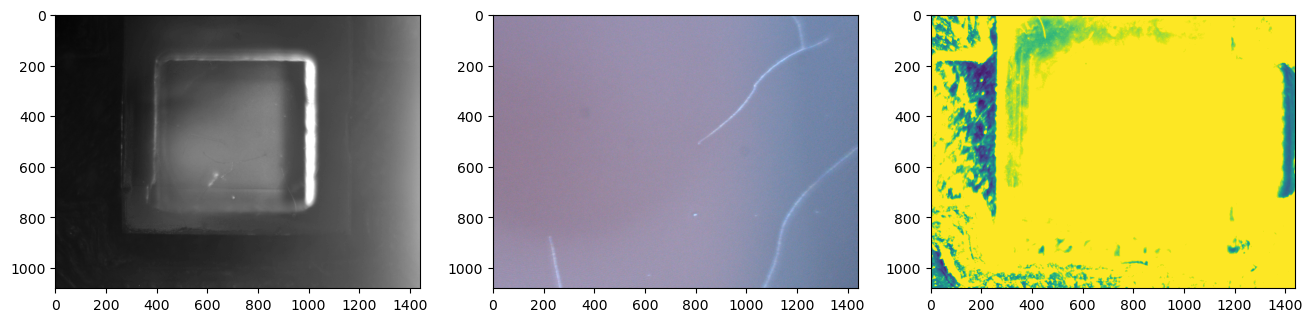

In [51]:
# plot images

fig, ax = plt.subplots(1,3, figsize=(16,10))
i=12

ax[0].imshow(rawdf['df_0'][i][:,:,0], cmap='gray')
ax[1].imshow(rawdf['bf_0'][i])
ax[2].imshow(rawdf['plimg_0'][i][:,:,0]) # use red channel for PL measurements, since that's what bandgap energy is

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Average pl')

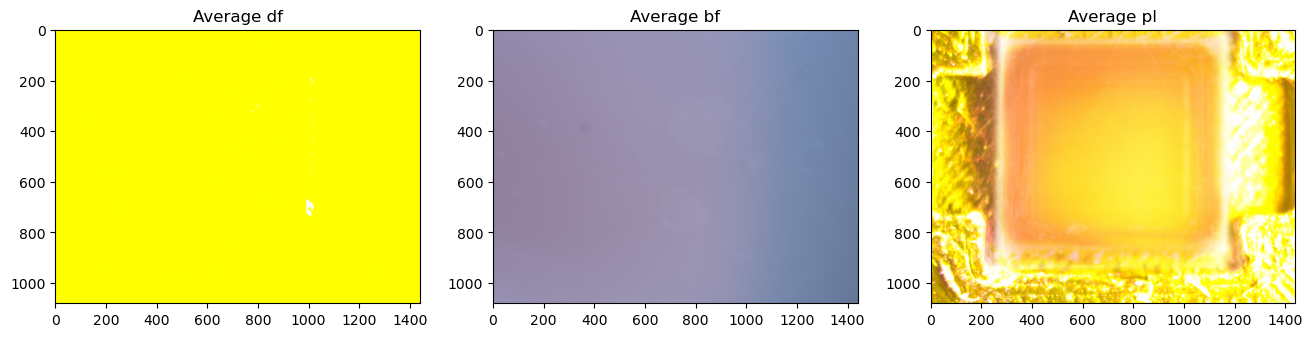

In [52]:
# display the "average" image for batch
# this shouldn't be too interesting if the batch is overall good

avg_df = np.average(rawdf['df_0'].to_numpy())
avg_bf = np.average(rawdf['bf_0'].to_numpy())
avg_pl = np.average(rawdf['plimg_0'].to_numpy())


fig, ax = plt.subplots(1,3, figsize=(16,10))

ax[0].imshow(avg_df)
ax[1].imshow(avg_bf)
ax[2].imshow(avg_pl)

ax[0].set_title('Average df')
ax[1].set_title('Average bf')
ax[2].set_title('Average pl')


140.4898 26.709078
85.53292 17.1172
0.0011953764 0.14205624
0.55559987 0.06726525
0.54446745 0.035007145
0.66303444 0.04209173
0.968323 0.07801501
0.80601424 0.17982134
0.31507406 0.28059864


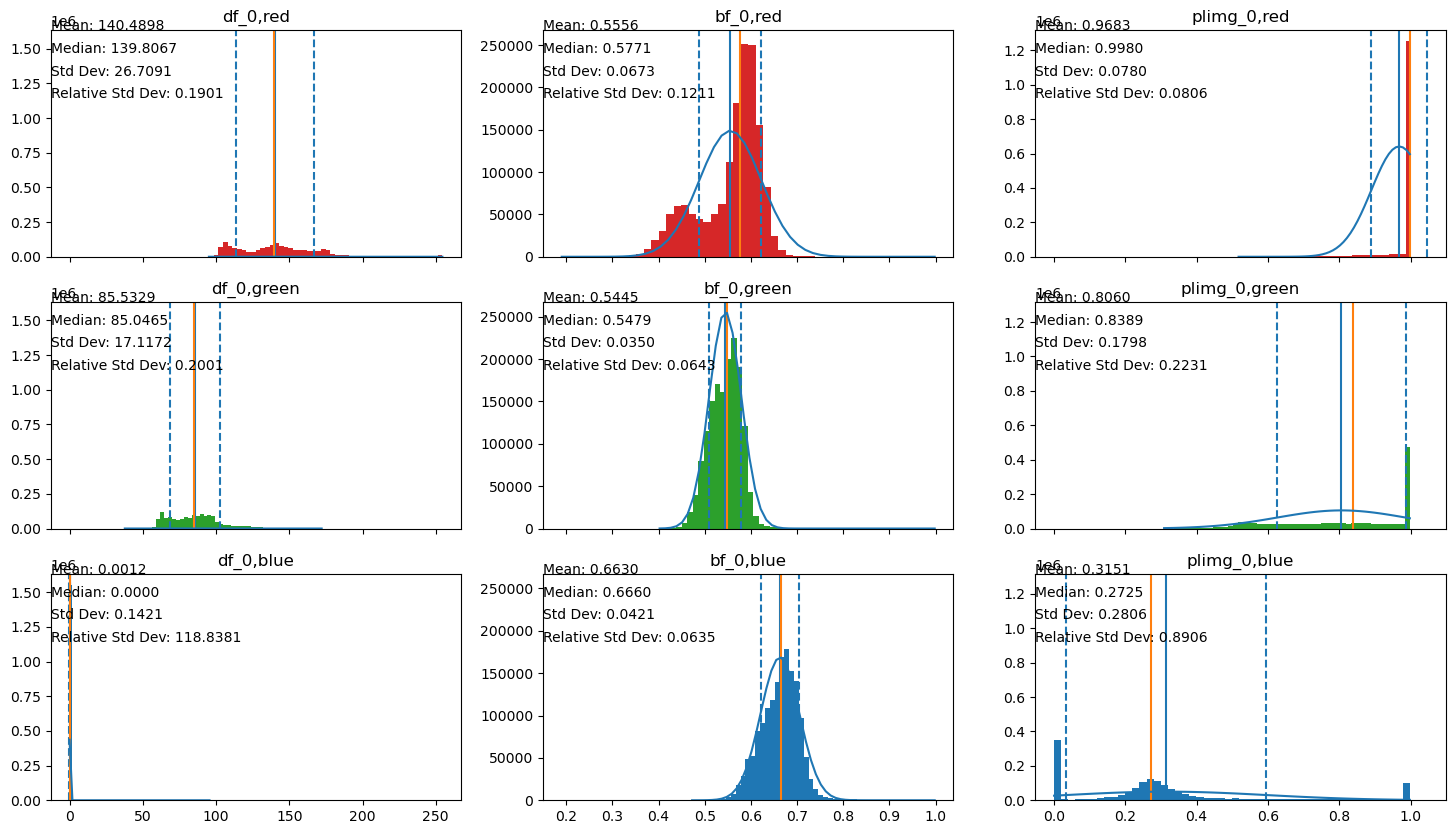

In [53]:
# plot histograms showing image rgb channel intensities
from scipy.stats import norm

n_bins = 50
fig, ax = plt.subplots(3,3, figsize=(18,10), sharex='col', sharey='col')

imgs = ['df_0','bf_0','plimg_0']
channel_names = ['red','green','blue']
colors = ['tab:red','tab:green','tab:blue']

for x in range(3):
    for y in range(3):
        # compute stats on the channel
        channel = rawdf[imgs[x]][i][:,:,y].flatten()
        mean = np.mean(channel)
        median = np.median(channel)
        std = np.std(channel)
        rsd = std / mean # coefficient of variation / relative standard deviation

        # now plot data
        ax[y,x].set_title(f'{imgs[x]},{channel_names[y]}')
        hist, bins, _ = ax[y,x].hist(
            channel,
            bins=n_bins,
            color=colors[y]
            )
        ax[y,x].annotate(f'Mean: {mean:.4f}', (0,1), xycoords='axes fraction')
        ax[y,x].annotate(f'Median: {median:.4f}', (0,0.9), xycoords='axes fraction')
        ax[y,x].annotate(f'Std Dev: {std:.4f}', (0,0.8), xycoords='axes fraction')
        ax[y,x].annotate(f'Relative Std Dev: {rsd:.4f}', (0,0.7), xycoords='axes fraction')

        ax[y,x].axvline(mean)
        ax[y,x].axvline(mean+std, linestyle='--')
        ax[y,x].axvline(mean-std, linestyle='--')
        ax[y,x].axvline(median, color='tab:orange')

        # try fitting a gaussian curve to the channel distribution
        mu, sigma = norm.fit(channel)
        print(mu, sigma)
        xpdf = np.linspace(np.min(channel), np.max(channel))
        ypdf = norm.pdf(xpdf, mu, sigma) * np.max(hist)/10
        ax[y,x].plot(xpdf, ypdf)

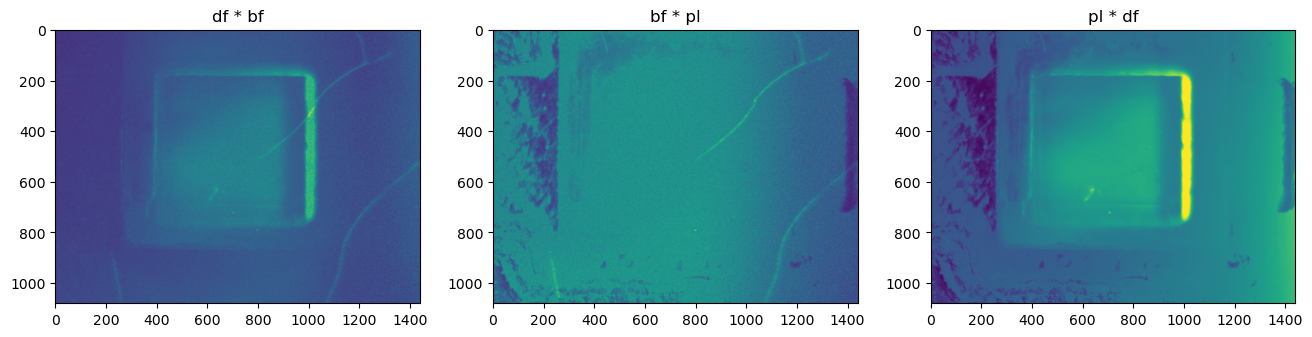

In [54]:
# try overlaying bf/df/pl images to see how it looks

# try each of the 3 possible two-image combinations
# for now the "filter" is simple multiplication
fig, ax = plt.subplots(1,3, figsize=(16,10))

ax[0].set_title('df * bf')
ax[1].set_title('bf * pl')
ax[2].set_title('pl * df')

ax[0].imshow(rawdf['df_0'][i][:,:,0] * rawdf['bf_0'][i][:,:,0]) # df * bf
ax[1].imshow(rawdf['bf_0'][i][:,:,0] * rawdf['plimg_0'][i][:,:,0]) # bf * pl
ax[2].imshow(rawdf['plimg_0'][i][:,:,0] * rawdf['df_0'][i][:,:,0]) # pl * df

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


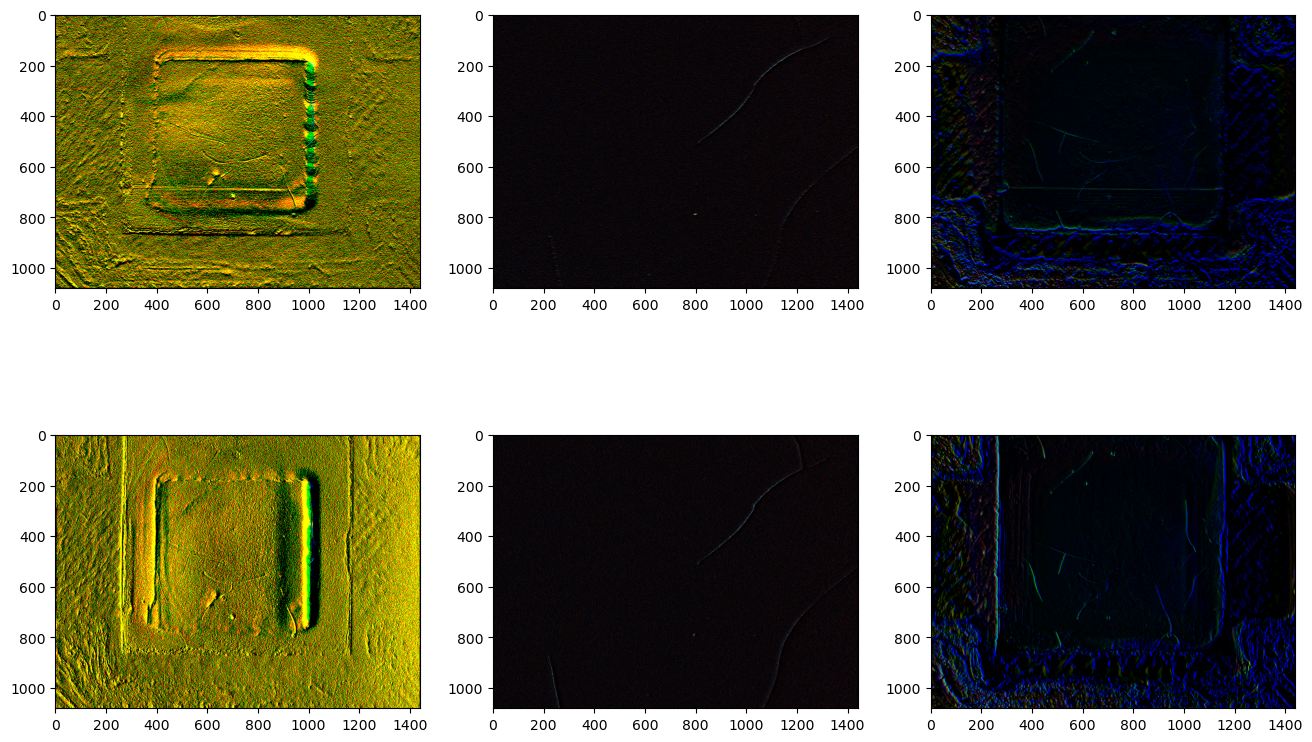

In [55]:
import tensorflow as tf
# try sobel edge detection to show defects

img_df = tf.cast(rawdf['df_0'][i], dtype=tf.float32) # cast to tensorflow tensor
img_df = tf.expand_dims(img_df, 0) # expand dimensions to get in format for tf processing
sobel_df = tf.nn.relu(tf.image.sobel_edges(img_df)) # apply sobel filter and rectify

img_bf = tf.cast(rawdf['bf_0'][i], dtype=tf.float32) # cast to tensorflow tensor
img_bf = tf.expand_dims(img_bf, 0) # expand dimensions to get in format for tf processing
sobel_bf = tf.nn.relu(tf.image.sobel_edges(img_bf))

img_pl = tf.cast(rawdf['plimg_0'][i], dtype=tf.float32) # cast to tensorflow tensor
img_pl = tf.expand_dims(img_pl, 0) # expand dimensions to get in format for tf processing
sobel_pl = tf.nn.relu(tf.image.sobel_edges(img_pl))

# now show edge images
fig, ax = plt.subplots(2,3, figsize=(16,10))
ax[0,0].imshow(tf.squeeze(sobel_df)[:,:,:,0]) # display horizontal edges on top row
ax[1,0].imshow(tf.squeeze(sobel_df)[:,:,:,1]) # then vertical edges on bottom row
ax[0,1].imshow(tf.squeeze(sobel_bf)[:,:,:,0])
ax[1,1].imshow(tf.squeeze(sobel_bf)[:,:,:,1])
ax[0,2].imshow(tf.squeeze(sobel_pl)[:,:,:,0])
ax[1,2].imshow(tf.squeeze(sobel_pl)[:,:,:,1])

(1, 1080, 1440, 3, 2)
1.2348181 2.4027417
(1, 1080, 1440, 3, 2)
0.89004374 1.4870548
(1, 1080, 1440, 3, 2)
0.0035932907 0.4080921
(1, 1080, 1440, 3, 2)
0.041533746 0.065372236
(1, 1080, 1440, 3, 2)
0.025655612 0.038622577
(1, 1080, 1440, 3, 2)
0.036833853 0.058262825
(1, 1080, 1440, 3, 2)
0.009024814 0.03886468
(1, 1080, 1440, 3, 2)
0.023432162 0.055423543
(1, 1080, 1440, 3, 2)
0.080602884 0.21605311


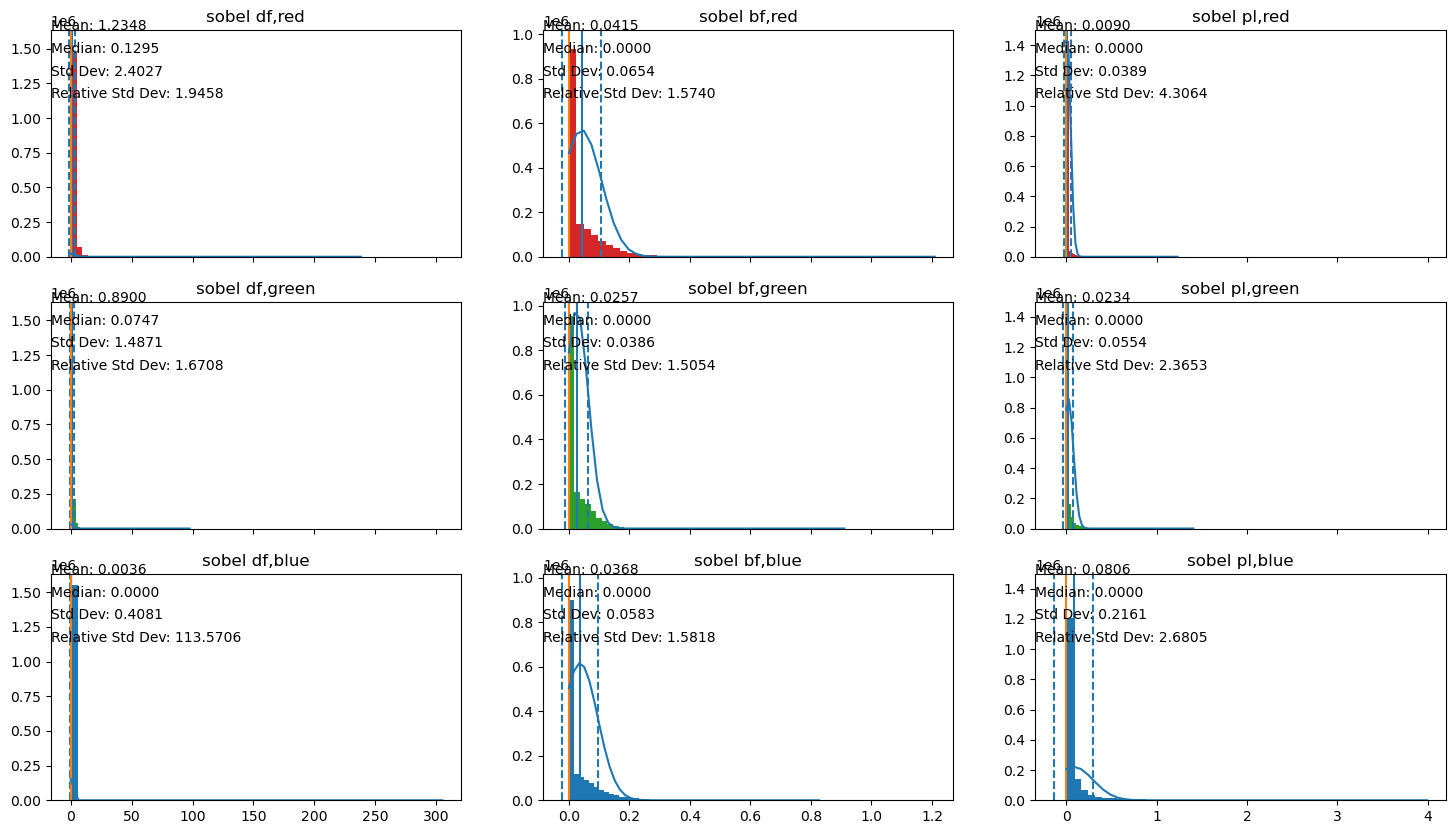

In [56]:
# compare channel histograms before and after sobel operation
# plot histograms showing image rgb channel intensities
from scipy.stats import norm

n_bins = 50
fig, ax = plt.subplots(3,3, figsize=(18,10), sharex='col', sharey='col')

titles = ['sobel df', 'sobel bf', 'sobel pl']
imgs = [sobel_df, sobel_bf, sobel_pl]
channel_names = ['red','green','blue']
colors = ['tab:red','tab:green','tab:blue']

for x in range(3):
    for y in range(3):
        # compute stats on the channel
        print(imgs[x].shape)
        channel = tf.squeeze(imgs[x])[:,:,y,0].numpy().flatten()
        mean = np.mean(channel)
        median = np.median(channel)
        std = np.std(channel)
        rsd = std / mean # coefficient of variation / relative standard deviation

        # now plot data
        ax[y,x].set_title(f'{titles[x]},{channel_names[y]}')
        hist, bins, _ = ax[y,x].hist(
            channel,
            bins=n_bins,
            color=colors[y]
            )
        ax[y,x].annotate(f'Mean: {mean:.4f}', (0,1), xycoords='axes fraction')
        ax[y,x].annotate(f'Median: {median:.4f}', (0,0.9), xycoords='axes fraction')
        ax[y,x].annotate(f'Std Dev: {std:.4f}', (0,0.8), xycoords='axes fraction')
        ax[y,x].annotate(f'Relative Std Dev: {rsd:.4f}', (0,0.7), xycoords='axes fraction')

        ax[y,x].axvline(mean)
        ax[y,x].axvline(mean+std, linestyle='--')
        ax[y,x].axvline(mean-std, linestyle='--')
        ax[y,x].axvline(median, color='tab:orange')

        # try fitting a gaussian curve to the channel distribution
        mu, sigma = norm.fit(channel)
        print(mu, sigma)
        xpdf = np.linspace(np.min(channel), np.max(channel))
        ypdf = norm.pdf(xpdf, mu, sigma) * np.max(hist)/10
        ax[y,x].plot(xpdf, ypdf)

# Classifying Defects by Shape
Different types of defects should have different shapes (pinholes vs scratches, grain boundaries, etc).

We apply some simple computer vision techniques to identify shapes.

(427, 1, 4)


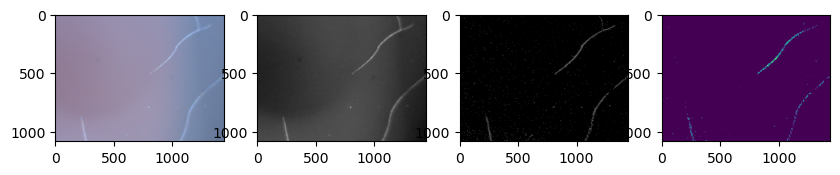

In [130]:
# now, specifically look for line defects which may be indicative of scratches
# use the Houghline method for line detection

import cv2 as cv

fig, ax = plt.subplots(1,4, figsize=(10,20))

ax[0].imshow(rawdf['bf_0'][i])

gray = cv.cvtColor(rawdf['bf_0'][i], cv2.COLOR_BGR2GRAY) # convert brightfield image to grayscale
ax[1].imshow(gray, cmap='gray')

# apply canny edge detection
# canny filter needs image in 8-bit uint format, so convert to 0-255
gray = np.uint8(255*gray)
# may need to tune the thresholds for hysteresis to get more visible lines
edges = cv.Canny(gray, 30, 50, apertureSize=3) 
ax[2].imshow(edges, cmap='gray')

# apply hough lines transform to find lines
# may need to tune resolution and threshold parameters
lines = cv.HoughLinesP(edges, 2, np.pi/180 * 4, 100)
print(lines.shape)

# now visualize the lines
img = np.zeros(gray.shape)
for r_theta in lines:
    arr = np.array(r_theta[0], dtype=np.int32)
    x1, y1, x2, y2 = arr

    # cv.line draws a line in img from the point(x1,y1) to (x2,y2).
    # (255,255,255) denotes the colour of the line to be drawn
    cv.line(img, (x1, y1), (x2, y2), (255, 255, 255), 2)

ax[3].imshow(img)

# Analyzing Spectra

Text(0.5, 1.0, 'PL and Transmission Spectra')

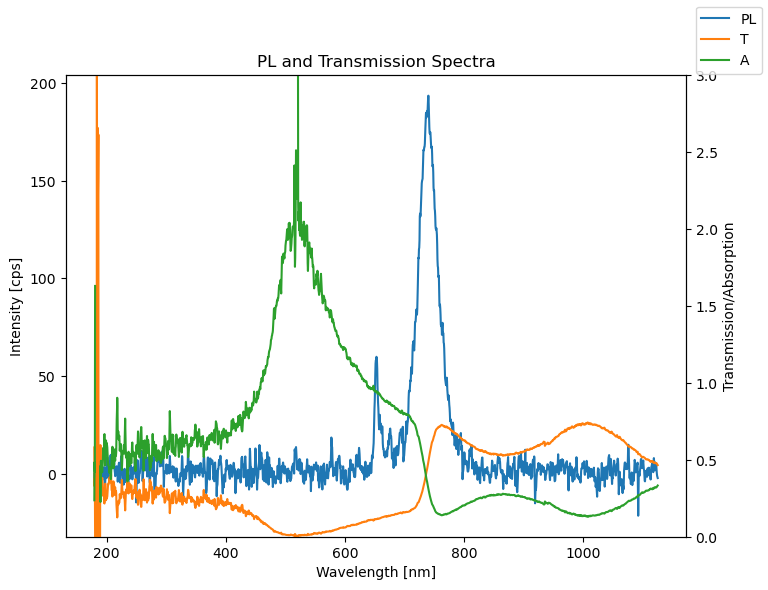

In [ ]:
# plot the pl and transmission spectra

fig, ax_pl = plt.subplots(figsize=(8,6))
ax_pl.plot(rawdf['pl_0'][i]['wl'], rawdf['pl_0'][i]['cps'])
ax_pl.set_xlabel('Wavelength [nm]')
ax_pl.set_ylabel('Intensity [cps]')

ax_t = ax_pl.twinx()
ax_t.set_ylabel('Transmission/Absorption')

ax_t.set_ylim(0, 3)
ax_t.plot(rawdf['t_0'][i]['wl'], rawdf['t_0'][i]['t'], color='tab:orange')
ax_t.plot(rawdf['t_0'][i]['wl'], rawdf['t_0'][i]['a'], color='tab:green')

fig.legend(['PL', 'T', 'A'])
plt.title('PL and Transmission Spectra')